<a href="https://colab.research.google.com/github/Krit-Barnwal/Summer-Ai-Ml/blob/main/Day7_Brain_tumour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import pandas as pd
import numpy as np
from sklearn import metrics,model_selection,svm
import joblib
import time

(512, 512, 3)


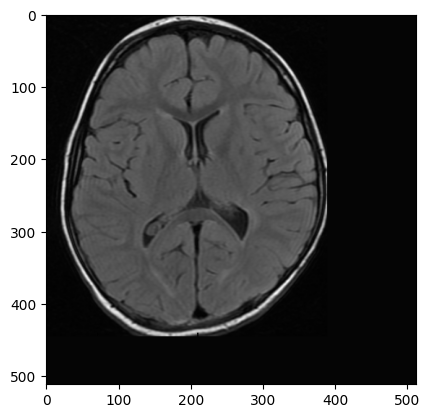

In [ ]:
path = f"/content/drive/MyDrive/Colab Notebooks/new_train/d({1}).png"
img = mimg.imread(path)
plt.imshow(img)
print(img.shape)
# features = img_resized.flatten()

In [ ]:
# !unzip "/content/drive/MyDrive/Colab Notebooks/new_train-20240708T092532Z-001.zip" -d "/content/drive/MyDrive/Colab Notebooks"

Archive:  /content/drive/MyDrive/Colab Notebooks/new_train-20240708T092532Z-001.zip
replace /content/drive/MyDrive/Colab Notebooks/new_train/d(44).png? [y]es, [n]o, [A]ll, [N]one, [r]ename: None


In [ ]:
# path = "/content/drive/MyDrive/Colab Notebooks/new_train/d(%d).png"%(i)

In [ ]:

from skimage.transform import resize

# Number of images
tot = 61
# Choose a common shape for resizing
common_shape = (512, 512, 3)
data_shape = common_shape[0] * common_shape[1] * common_shape[2]

# Initialize placeholders for images and labels
data = np.zeros((tot,data_shape))
images = np.zeros((tot,*common_shape))
labels = np.zeros((tot))
print(data.shape)
print(images.shape)

(61, 786432)
(61, 512, 512, 3)


In [ ]:
for i in range(1, tot + 1):
    path = f"/content/drive/MyDrive/Colab Notebooks/new_train/d({i}).png"
    img = mimg.imread(path)
    # Resize the image to the common shape
    resized_img = resize(img, common_shape, anti_aliasing=True)
    feat = resized_img.reshape(1, -1)  # Flatten the image for features
    #eat = img.reshape(1, -1)
    # Append the features and outcome to data list
    data[i - 1, :] = feat
    images[i - 1, :, :, :] = resized_img
    if i < 40:
        labels[i - 1] = 0
    else:
        labels[i - 1] = 1

In [ ]:

Xtrain,Xtest,Ytrain,Ytest = model_selection.train_test_split(data,labels,random_state = 5,test_size = 0.3)
print(Xtrain.shape,Xtest.shape)
print(Ytrain.shape,Ytest.shape)

(42, 786432) (19, 786432)
(42,) (19,)


In [ ]:
ker = ['poly','linear','rbf']
c = [1,2,3]
resultdf = pd.DataFrame(columns = ker,index = [1,2,3])
resultdf.index.name = "C"
for ker_i in ker:
  for c_value in c:
    model = svm.SVC(kernel = ker_i,C= c_value ,gamma = "scale")
    model = model.fit(Xtrain,Ytrain)
    ypred = model.predict(Xtest)
    acc = metrics.accuracy_score(ypred,Ytest)
    resultdf.loc[c_value,ker_i] = acc

In [ ]:
print(resultdf)

       poly    linear       rbf
C                              
1  0.842105  0.894737  0.578947
2  0.842105  0.894737  0.842105
3  0.842105  0.894737  0.842105


In [ ]:
model = svm.SVC(kernel = "linear",C = 1,gamma = "scale")
brain_tumor_model = model.fit(Xtrain,Ytrain)
joblib.dump(brain_tumor_model,"/content/drive/MyDrive/Colab Notebooks/new_train/brain_tumor_model.pkl")

['/content/drive/MyDrive/Colab Notebooks/new_train/brain_tumor_model.pkl']